# Quantum dimension of machine learning 

*~ QubitFreaks*

---

[Abstrakt tutorialu o uczeniu maszynowym, wstęp]

# 🛫 Getting started
## 🛒 Install requirements from a file 

In [ ]:
!pip install -r ./requirements.txt

## 📃 Generate a sample data for training and testing

In [1]:
# Imports for data loader & vizualizations 
from sklearn.datasets import make_moons

# Randomly choosen number ti init randomness
random_seed = 1829

X, y = make_moons(n_samples=200, noise=.08, random_state=random_seed)

We just generated 200 `samples` (arrays) each with two values. The both values of every `sample` represent thier feature. 

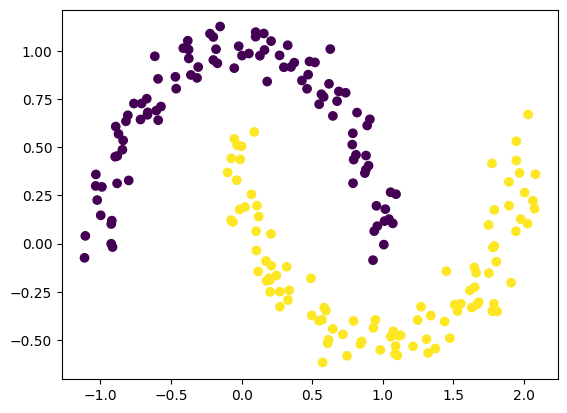

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt 

plt.scatter(X[:,0], X[:,1], c=y)